## Dataset - Beijing Multi-Site Air-Quality Data Data Set


The dataset chosen in this article (420768 instances and 18 attributes) comes from
the UCI Machine Learning Repository. this dataset shows the concentration of
air pollutants and air quality at 12 sites. The air quality data comes from the Beijing
Municipal Environmental Monitoring Center. The meteorological data indicating
the air quality for each site is matched with the nearest meteorological station of the
China Meteorological Administration.


In [28]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
import datetime

In [29]:
url = 'https://raw.githubusercontent.com/muhammadnabeelkhan/thesis/main/air%20pollution%20prediction/datasets/PRSA_Data_20130301-20170228/PRSA_Data_Aotizhongxin_20130301-20170228.csv'
data = url
df = pd.read_csv(data, header=[0], sep=',')
df


,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station
0,1,2013,3,1,0,4.0,4.0,4.0,7.0,300.0,77.0,-0.7,1023.0,-18.8,0.0,NNW,4.4,Aotizhongxin
1,2,2013,3,1,1,8.0,8.0,4.0,7.0,300.0,77.0,-1.1,1023.2,-18.2,0.0,N,4.7,Aotizhongxin
2,3,2013,3,1,2,7.0,7.0,5.0,10.0,300.0,73.0,-1.1,1023.5,-18.2,0.0,NNW,5.6,Aotizhongxin
3,4,2013,3,1,3,6.0,6.0,11.0,11.0,300.0,72.0,-1.4,1024.5,-19.4,0.0,NW,3.1,Aotizhongxin
4,5,2013,3,1,4,3.0,3.0,12.0,12.0,300.0,72.0,-2.0,1025.2,-19.5,0.0,N,2.0,Aotizhongxin
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
35059,35060,2017,2,28,19,12.0,29.0,5.0,35.0,400.0,95.0,12.5,1013.5,-16.2,0.0,NW,2.4,Aotizhongxin
35060,35061,2017,2,28,20,13.0,37.0,7.0,45.0,500.0,81.0,11.6,1013.6,-15.1,0.0,WNW,0.9,Aotizhongxin
35061,35062,2017,2,28,21,16.0,37.0,10.0,66.0,700.0,58.0,10.8,1014.2,-13.3,0.0,NW,1.1,Aotizhongxin
35062,35063,2017,2,28,22,21.0,44.0,12.0,87.0,700.0,35.0,10.5,1014.4,-12.9,0.0,NNW,1.2,Aotizhongxin


In [30]:
# datatype for columns
df.dtypes


No           int64
year         int64
month        int64
day          int64
hour         int64
PM2.5      float64
PM10       float64
SO2        float64
NO2        float64
CO         float64
O3         float64
TEMP       float64
PRES       float64
DEWP       float64
RAIN       float64
wd          object
WSPM       float64
station     object
dtype: object

In [31]:
# display categorical variables
categorical = [col for col in df.columns if df[col].dtypes == 'O']
categorical


['wd', 'station']

In [32]:
# display numerical variables
numerical = [col for col in df.columns if df[col].dtypes != 'O']
numerical


['No',
 'year',
 'month',
 'day',
 'hour',
 'PM2.5',
 'PM10',
 'SO2',
 'NO2',
 'CO',
 'O3',
 'TEMP',
 'PRES',
 'DEWP',
 'RAIN',
 'WSPM']

# Preprocessing



Setting Datetime as Index

In [33]:
dataset = pd.read_csv(data, header=[0], sep=",")
dataset

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station
0,1,2013,3,1,0,4.0,4.0,4.0,7.0,300.0,77.0,-0.7,1023.0,-18.8,0.0,NNW,4.4,Aotizhongxin
1,2,2013,3,1,1,8.0,8.0,4.0,7.0,300.0,77.0,-1.1,1023.2,-18.2,0.0,N,4.7,Aotizhongxin
2,3,2013,3,1,2,7.0,7.0,5.0,10.0,300.0,73.0,-1.1,1023.5,-18.2,0.0,NNW,5.6,Aotizhongxin
3,4,2013,3,1,3,6.0,6.0,11.0,11.0,300.0,72.0,-1.4,1024.5,-19.4,0.0,NW,3.1,Aotizhongxin
4,5,2013,3,1,4,3.0,3.0,12.0,12.0,300.0,72.0,-2.0,1025.2,-19.5,0.0,N,2.0,Aotizhongxin
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
35059,35060,2017,2,28,19,12.0,29.0,5.0,35.0,400.0,95.0,12.5,1013.5,-16.2,0.0,NW,2.4,Aotizhongxin
35060,35061,2017,2,28,20,13.0,37.0,7.0,45.0,500.0,81.0,11.6,1013.6,-15.1,0.0,WNW,0.9,Aotizhongxin
35061,35062,2017,2,28,21,16.0,37.0,10.0,66.0,700.0,58.0,10.8,1014.2,-13.3,0.0,NW,1.1,Aotizhongxin
35062,35063,2017,2,28,22,21.0,44.0,12.0,87.0,700.0,35.0,10.5,1014.4,-12.9,0.0,NNW,1.2,Aotizhongxin


In [35]:
# for index, row in dataset.iterrows():
#   stringDate = row["datetime"].split() 
#   dt = datetime.datetime(int(stringDate[0]), int(stringDate[1]), int(stringDate[2]))
#   tm = datetime.time(int(stringDate[3]))
#   combined = dt.combine(dt, tm)
#   dataset["datetime"][index] = combined

In [36]:
dataset= dataset.set_index('datetime')
dataset.drop(['year', 'month', 'day', 'hour', 'No'], axis=1, inplace=True)
dataset

,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station
datetime,,,,,,,,,,,,,
2013-03-01 00:00:00,4.0,4.0,4.0,7.0,300.0,77.0,-0.7,1023.0,-18.8,0.0,NNW,4.4,Aotizhongxin
2013-03-01 01:00:00,8.0,8.0,4.0,7.0,300.0,77.0,-1.1,1023.2,-18.2,0.0,N,4.7,Aotizhongxin
2013-03-01 02:00:00,7.0,7.0,5.0,10.0,300.0,73.0,-1.1,1023.5,-18.2,0.0,NNW,5.6,Aotizhongxin
2013-03-01 03:00:00,6.0,6.0,11.0,11.0,300.0,72.0,-1.4,1024.5,-19.4,0.0,NW,3.1,Aotizhongxin
2013-03-01 04:00:00,3.0,3.0,12.0,12.0,300.0,72.0,-2.0,1025.2,-19.5,0.0,N,2.0,Aotizhongxin
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2017-02-28 19:00:00,12.0,29.0,5.0,35.0,400.0,95.0,12.5,1013.5,-16.2,0.0,NW,2.4,Aotizhongxin
2017-02-28 20:00:00,13.0,37.0,7.0,45.0,500.0,81.0,11.6,1013.6,-15.1,0.0,WNW,0.9,Aotizhongxin
2017-02-28 21:00:00,16.0,37.0,10.0,66.0,700.0,58.0,10.8,1014.2,-13.3,0.0,NW,1.1,Aotizhongxin


Missing Values

In [37]:
# missing value detection
dataset.isnull().sum()

PM2.5       925
PM10        718
SO2         935
NO2        1023
CO         1776
O3         1719
TEMP         20
PRES         20
DEWP         20
RAIN         20
wd           81
WSPM         14
station       0
dtype: int64

In [38]:
dataset.isnull().sum().sum()

7271

In [39]:
#missing values in relative form
dataset.isnull().mean()

PM2.5      0.026380
PM10       0.020477
SO2        0.026666
NO2        0.029175
CO         0.050650
O3         0.049025
TEMP       0.000570
PRES       0.000570
DEWP       0.000570
RAIN       0.000570
wd         0.002310
WSPM       0.000399
station    0.000000
dtype: float64

In [40]:
# missing value in categorical columns
dataset[categorical].isnull().mean()

wd         0.00231
station    0.00000
dtype: float64

In [41]:
# view frequency counts of values in categorical variables
for var in categorical:
    print(dataset[var].value_counts())

NE     5140
ENE    3950
SW     3359
E      2608
NNE    2445
WSW    2212
SSW    2098
N      2066
NW     1860
ESE    1717
NNW    1589
SE     1341
S      1304
W      1171
WNW    1101
SSE    1022
Name: wd, dtype: int64
Aotizhongxin    35064
Name: station, dtype: int64


In [42]:
# check for cardinality in categorical variables
for var in categorical:
    print(var, ' contains ', len(dataset[var].unique()), ' labels', (dataset[var].unique()))


wd  contains  17  labels ['NNW' 'N' 'NW' 'NNE' 'ENE' 'E' 'NE' 'W' 'SSW' 'WSW' 'SE' 'WNW' 'SSE'
 'ESE' 'S' 'SW' nan]
station  contains  1  labels ['Aotizhongxin']


In [43]:
# creating series True or False for NaN data and present data respectively. 
nul_data = pd.isnull(dataset['PM2.5']) 
    
# print only the data, Customers = NaN 
dataset[nul_data]

,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station
datetime,,,,,,,,,,,,,
2013-05-02 21:00:00,NaN,183.0,63.0000,93.0000,1200.0,38.0000,18.5,1006.1,6.0,0.0,SE,2.8,Aotizhongxin
2013-05-16 13:00:00,NaN,98.0,46.0000,35.0000,600.0,166.0000,26.1,1009.9,10.7,0.0,SW,2.7,Aotizhongxin
2013-06-07 16:00:00,NaN,137.0,12.0000,74.0000,2500.0,8.0000,20.7,1002.4,19.4,0.0,NNE,0.8,Aotizhongxin
2013-06-25 01:00:00,NaN,35.0,3.1416,35.1063,NaN,60.6186,20.8,996.5,20.5,0.0,NE,0.2,Aotizhongxin
2013-06-26 00:00:00,NaN,183.0,64.2600,40.0335,NaN,NaN,21.7,993.0,21.2,0.0,NNW,0.4,Aotizhongxin
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2017-02-21 08:00:00,NaN,NaN,NaN,NaN,NaN,NaN,-0.3,1028.8,-15.8,0.0,SSE,1.0,Aotizhongxin
2017-02-21 11:00:00,NaN,NaN,NaN,NaN,NaN,NaN,1.3,1028.0,-16.1,0.0,S,1.5,Aotizhongxin
2017-02-21 13:00:00,NaN,NaN,NaN,NaN,NaN,NaN,-2.1,1027.4,-4.1,0.7,WSW,3.2,Aotizhongxin


In [44]:
pm25 =dataset[["PM2.5"]]

In [45]:
# on our data, impute the missing values using the interpolation techniques and specifically, the lineare method
pmSplined = dataset[["PM2.5"]].interpolate('spline', order=1)

In [46]:
pmSplined

,PM2.5
datetime,
2013-03-01 00:00:00,4.0
2013-03-01 01:00:00,8.0
2013-03-01 02:00:00,7.0
2013-03-01 03:00:00,6.0
2013-03-01 04:00:00,3.0
...,...
2017-02-28 19:00:00,12.0
2017-02-28 20:00:00,13.0
2017-02-28 21:00:00,16.0


In [47]:
df_diff = pd.concat([pm25,pmSplined]).drop_duplicates(keep=False)

In [48]:
df_diff

,PM2.5
datetime,
2013-05-02 21:00:00,123.706775
2013-05-16 13:00:00,349.697366
2013-06-07 16:00:00,119.163115
2013-06-25 01:00:00,38.276311
2013-06-26 00:00:00,145.687707
...,...
2017-02-21 08:00:00,79.552904
2017-02-21 11:00:00,96.297745
2017-02-21 13:00:00,66.578683


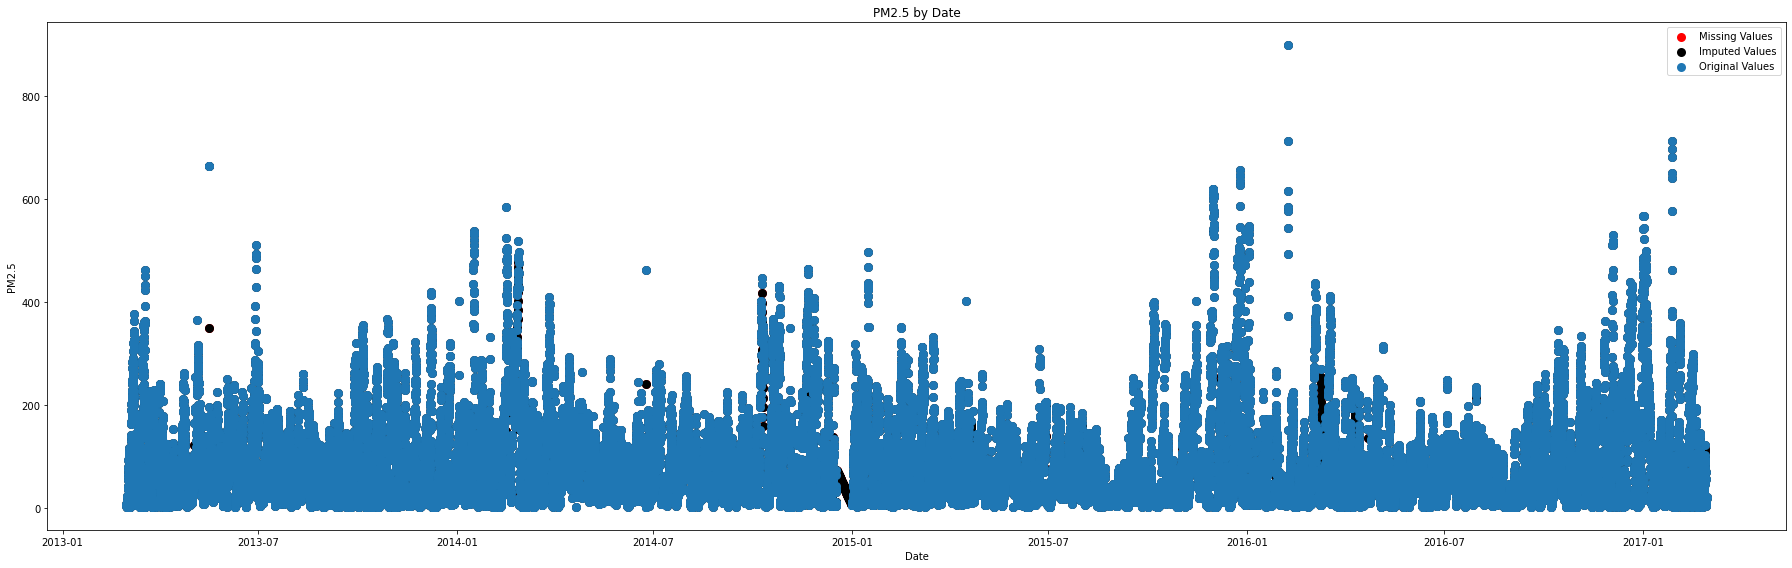

In [70]:
# Create figure

fig = plt.figure(figsize=(25, 8))

# Plot time series


plt.scatter(df_diff.index, df_diff, color='red', 
         label='Missing Values', linewidth=3)
plt.scatter(pmSplined.index.values, pmSplined, color='black', label='Imputed Values', 
         linewidth=3)
plt.scatter(pm25.index.values, pm25, label='Original Values', 
         linewidth=3)
# Add title and labels

plt.title('PM2.5 by Date')
plt.xlabel('Date')
plt.ylabel('PM2.5')

# Add legend

plt.legend()

# Auto space

plt.tight_layout()

# Display plot

plt.show() 

In [71]:
imputedDataset = dataset.interpolate('spline', order=1)

In [72]:
df_diff = pd.concat([imputedDataset, dataset]).drop_duplicates(keep=False)

In [73]:
df_diff

,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station
datetime,,,,,,,,,,,,,
2013-03-04 02:00:00,34.0,62.0,22.21012,14.000000,300.000000,68.0,8.1,1016.7,-11.8,0.0,N,4.3,Aotizhongxin
2013-03-04 03:00:00,12.0,34.0,6.00000,12.000000,350.315927,77.0,7.2,1016.9,-11.6,0.0,N,2.8,Aotizhongxin
2013-03-04 04:00:00,7.0,18.0,14.00000,28.490448,400.000000,42.0,6.0,1018.0,-11.6,0.0,NNW,1.0,Aotizhongxin
2013-03-06 04:00:00,192.0,203.0,83.68080,140.425200,2550.159250,22.0,3.9,1007.3,-6.1,0.0,NE,1.4,Aotizhongxin
2013-03-08 02:00:00,339.0,400.0,80.24483,162.000000,3899.000000,84.0,2.5,998.2,-1.9,0.0,SW,0.8,Aotizhongxin
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2017-02-22 16:00:00,131.0,131.0,NaN,95.000000,NaN,47.0,6.0,1017.0,-4.2,0.0,WNW,1.2,Aotizhongxin
2017-02-22 17:00:00,28.0,28.0,11.00000,17.000000,500.000000,NaN,6.8,1017.6,-9.2,0.0,NNW,2.6,Aotizhongxin
2017-02-27 11:00:00,122.0,122.0,NaN,NaN,NaN,42.0,10.0,1018.3,-5.6,0.0,ESE,1.4,Aotizhongxin


In [93]:
dataset = imputedDataset

Encoding Categorical Data

In [94]:
dataset.wd.unique()

array(['Aotizhongxin'], dtype=object)

In [95]:
dataset[["wd"]].value_counts()

wd          
Aotizhongxin    35064
dtype: int64

In [96]:
labels = ["N", "NNE", "NE", "ENE", "E", "ESE", "SE", "SSE", "S", "SSW", "SW", "WSW", "W", "WNW", "NW", "NNW"]

In [97]:
values = [0 , 22.5, 45, 67.5, 90, 112.5, 135, 157.5, 180, 202.5, 225, 247.5, 270, 292.5, 315, 337.5]

In [98]:
#relabel the values
dataset.wd = dataset.wd.replace(labels, values)

In [99]:
dataset.wd.unique()

array(['Aotizhongxin'], dtype=object)

Imputing Missing Values in Categorical Data

In [100]:
dataset.wd = dataset.wd.interpolate(method="nearest")

In [101]:
np.sort(dataset.wd.unique()) == values

array([False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False])

In [102]:
dataset.wd.unique()

array(['Aotizhongxin'], dtype=object)

In [103]:
len(dataset.wd.unique())

1

Normalization

# Feature Selection

Air Quality Features
In the atmosphere, we detect different pollutants, the increase of their concentrations 
negatively affects the quality of the air. We calculated the correlations between the features, of the air quality and we found a high correlation value between PM2.5, PM10, and 
CO as shown in Fig

In [104]:
airQuality = ['PM2.5', 'PM10', 'SO2', 'NO2', 'CO', 'O3']

In [105]:
meteorological = ['TEMP', 'PRES', 'DEWP', 'RAIN', 'WSPM']

AirQuality

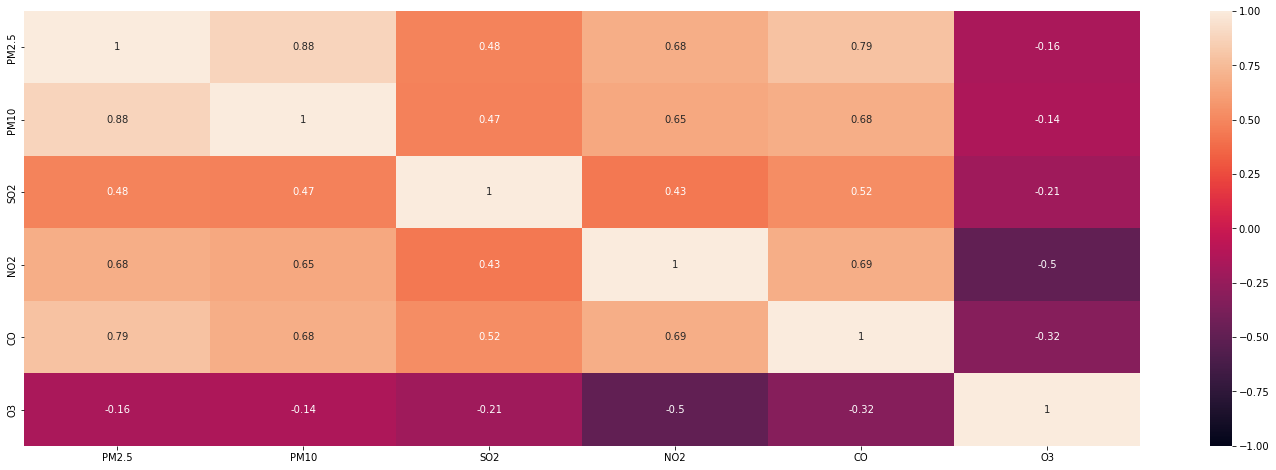

In [106]:
fig = plt.figure(figsize=(25, 8))
# plotting correlation heatmap
dataplot = sb.heatmap(dataset[airQuality].corr(), annot=True, vmin=-1, vmax=1)
  
# displaying heatmap
plt.show()

Meteorological Features

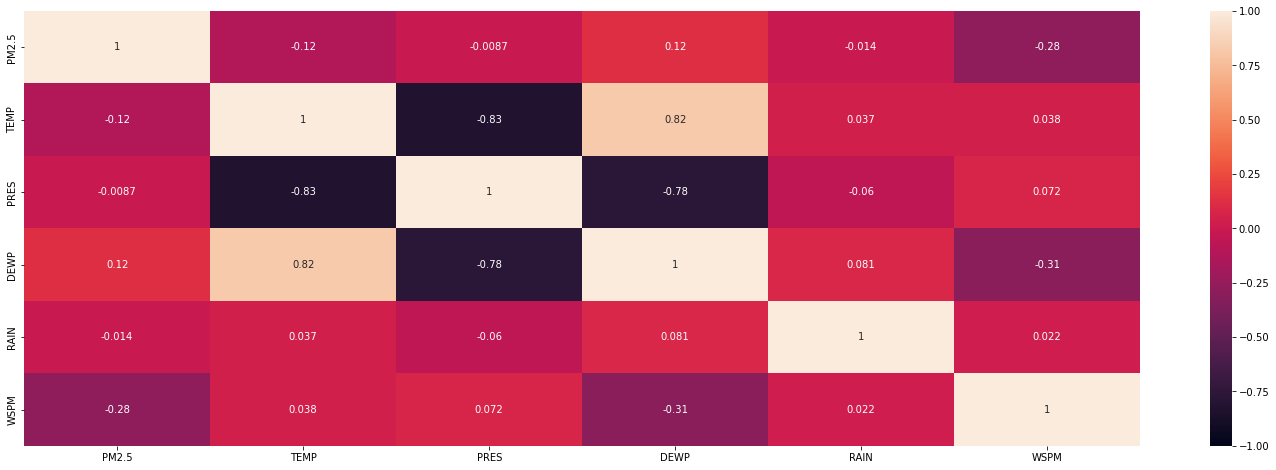

In [107]:

plt.figure(figsize=(25, 8))
dataplot = sb.heatmap(
    dataset[["PM2.5", *meteorological]].corr(), annot=True, vmin=-1, vmax=1)
plt.show()


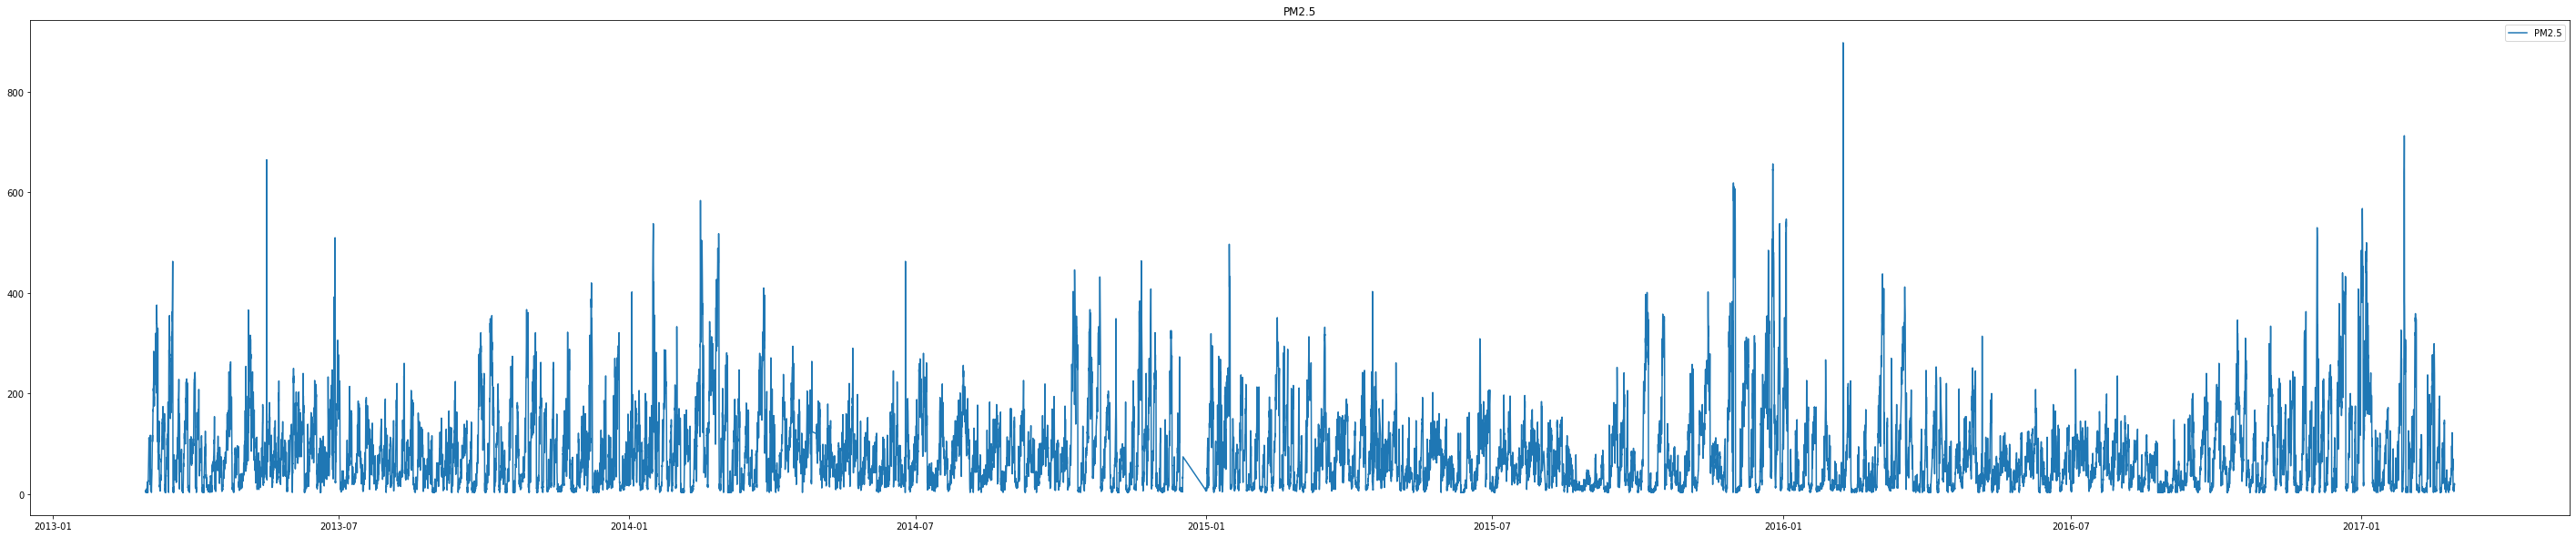

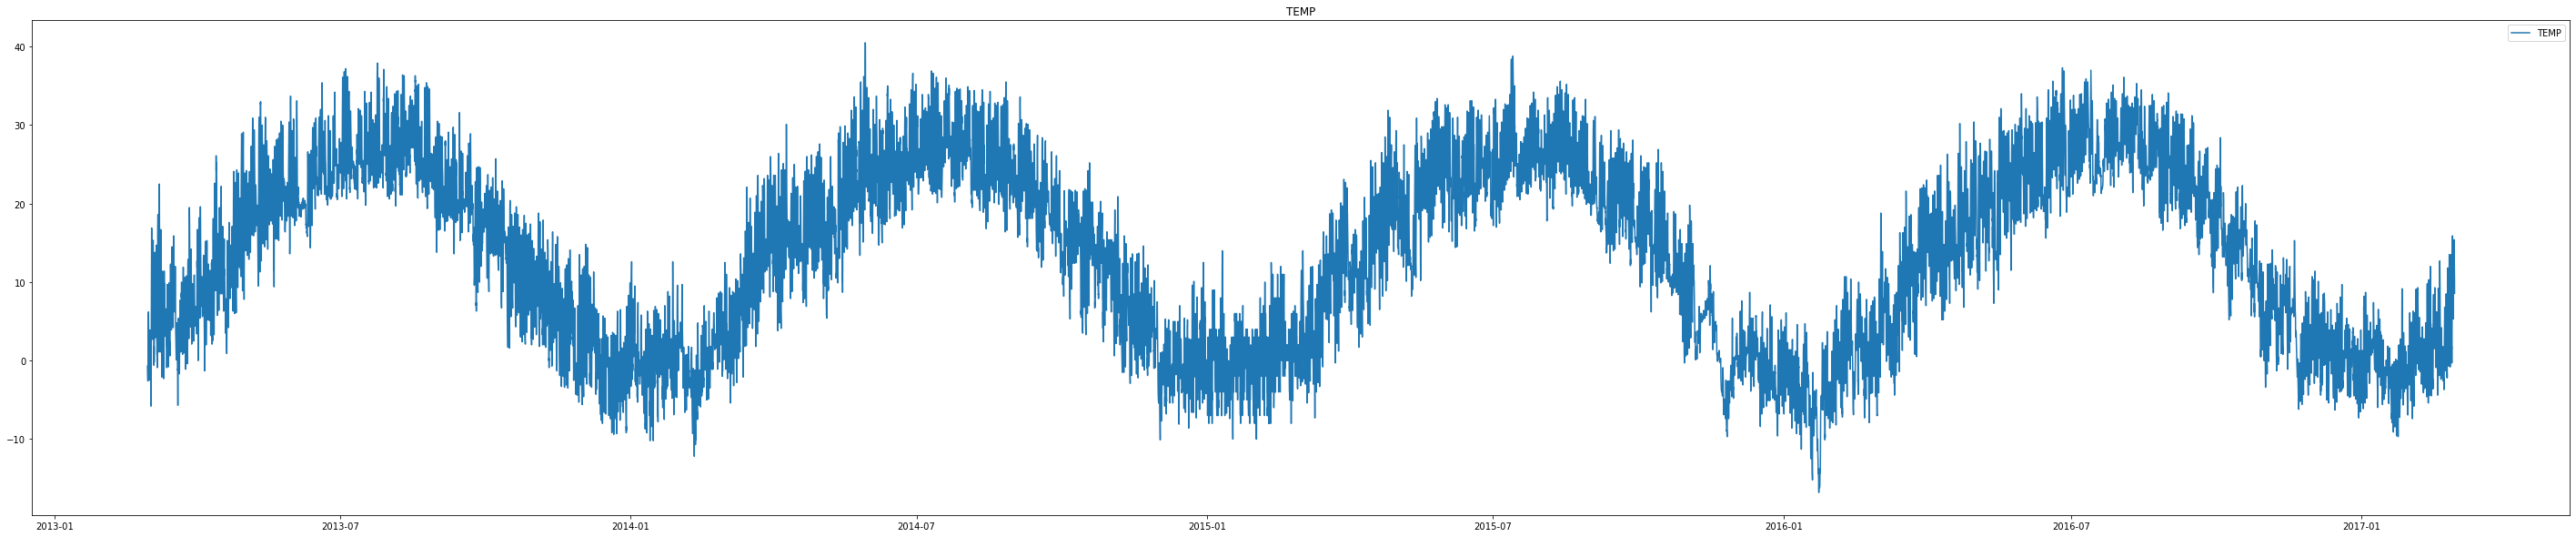

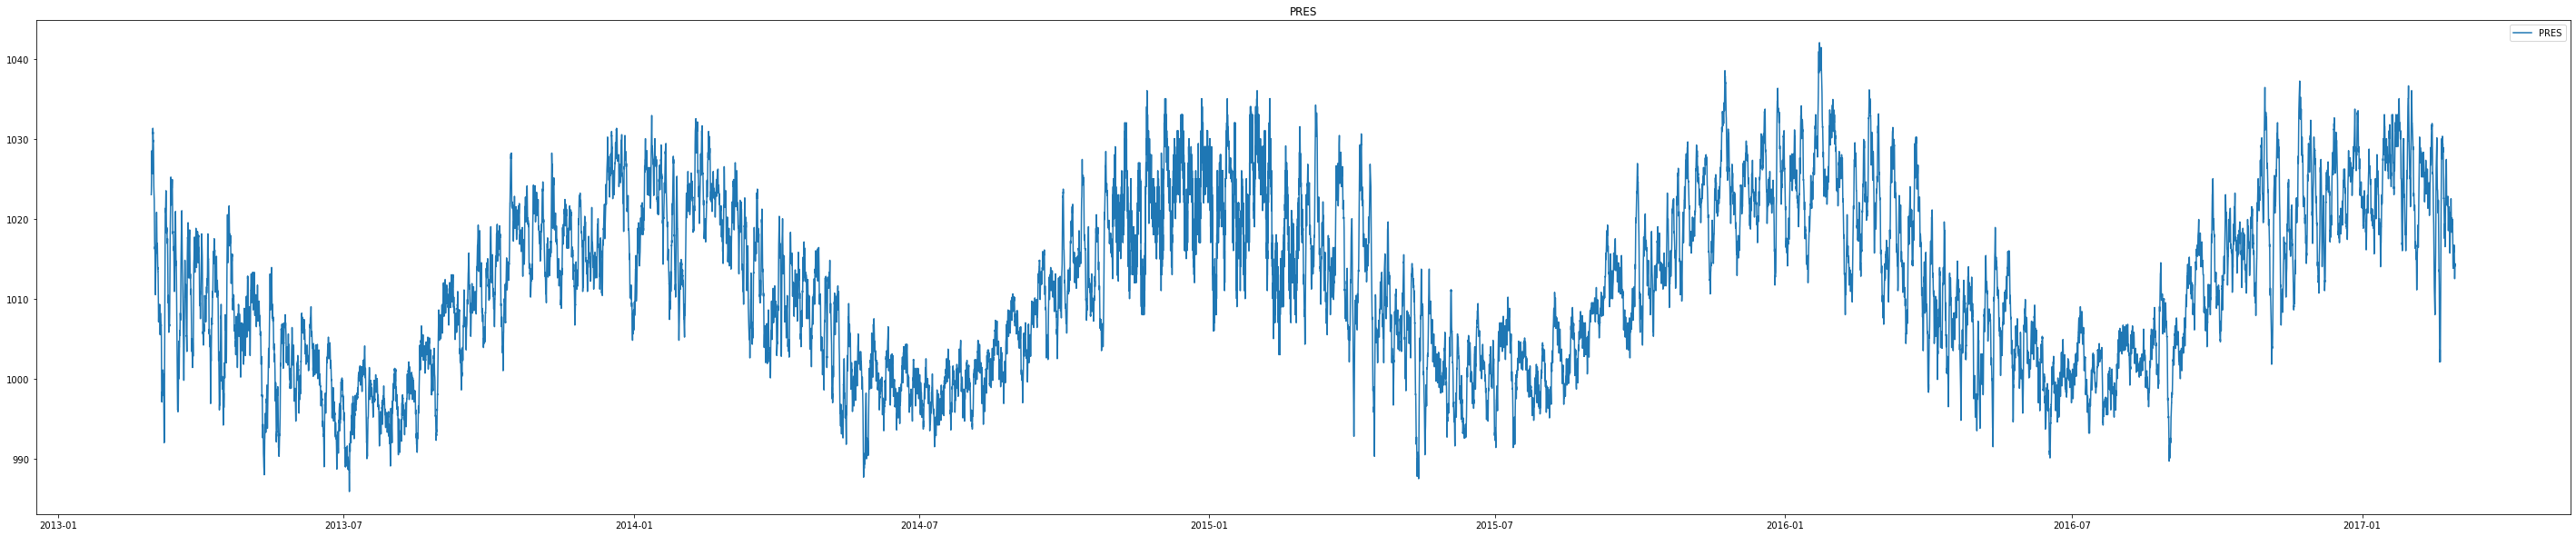

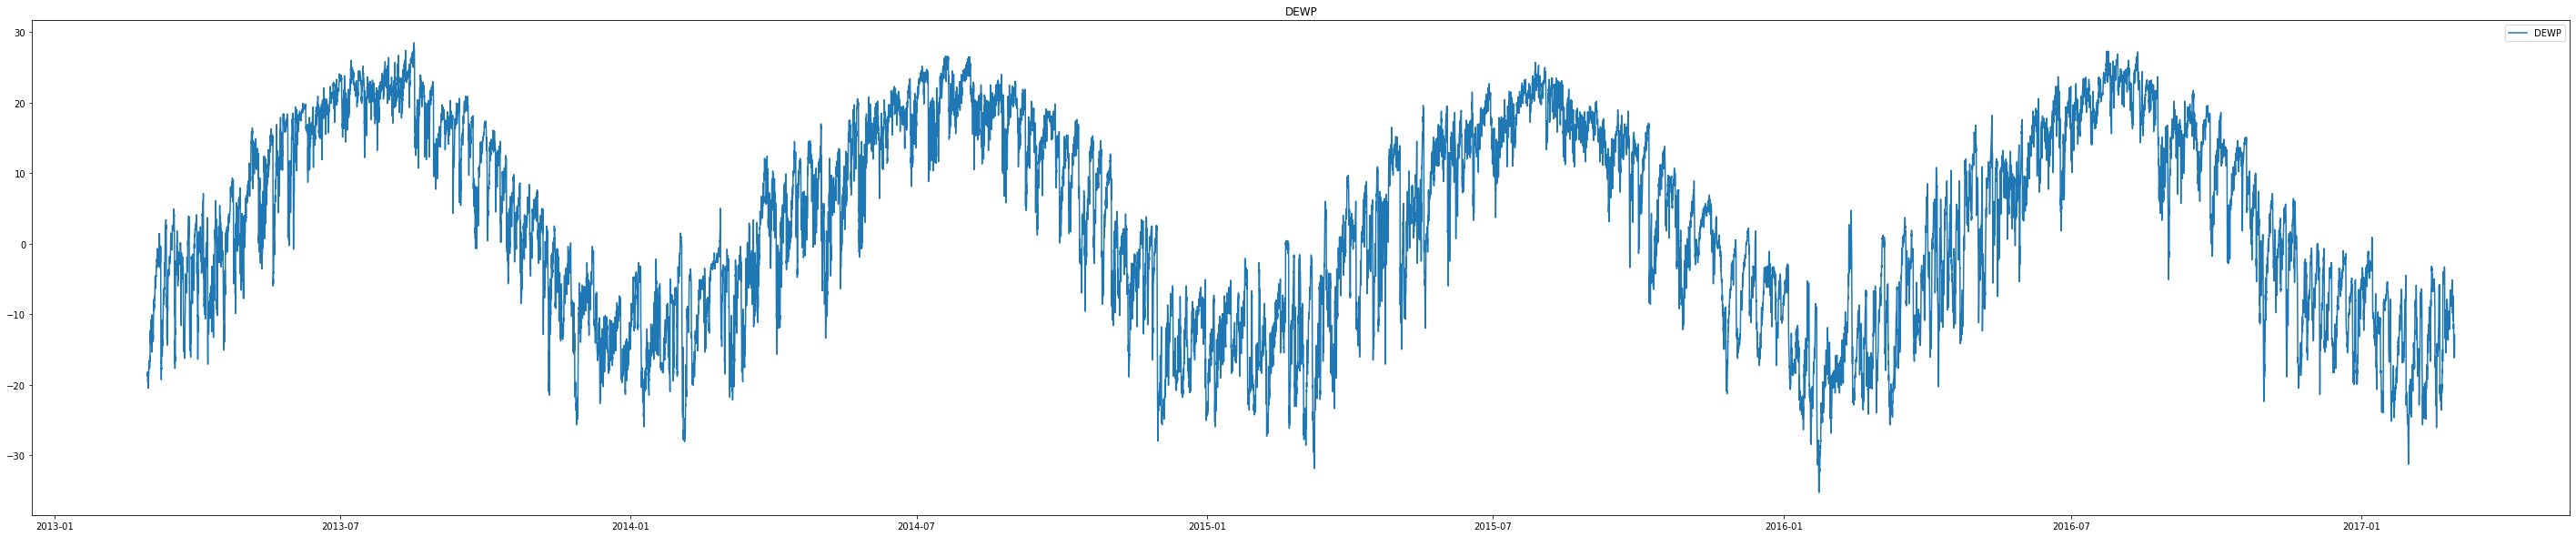

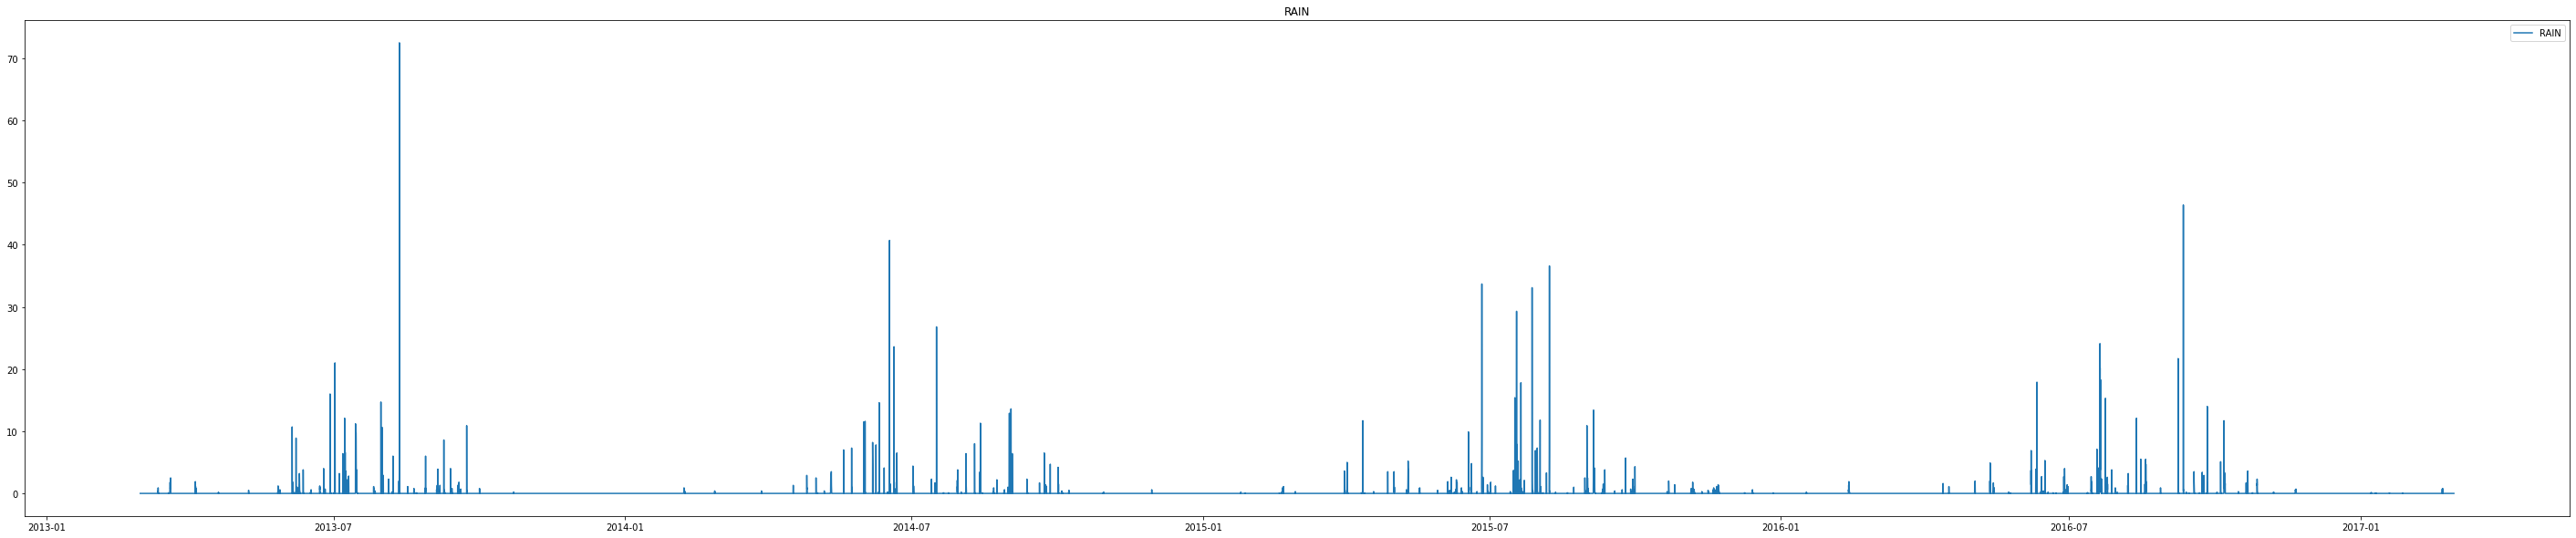

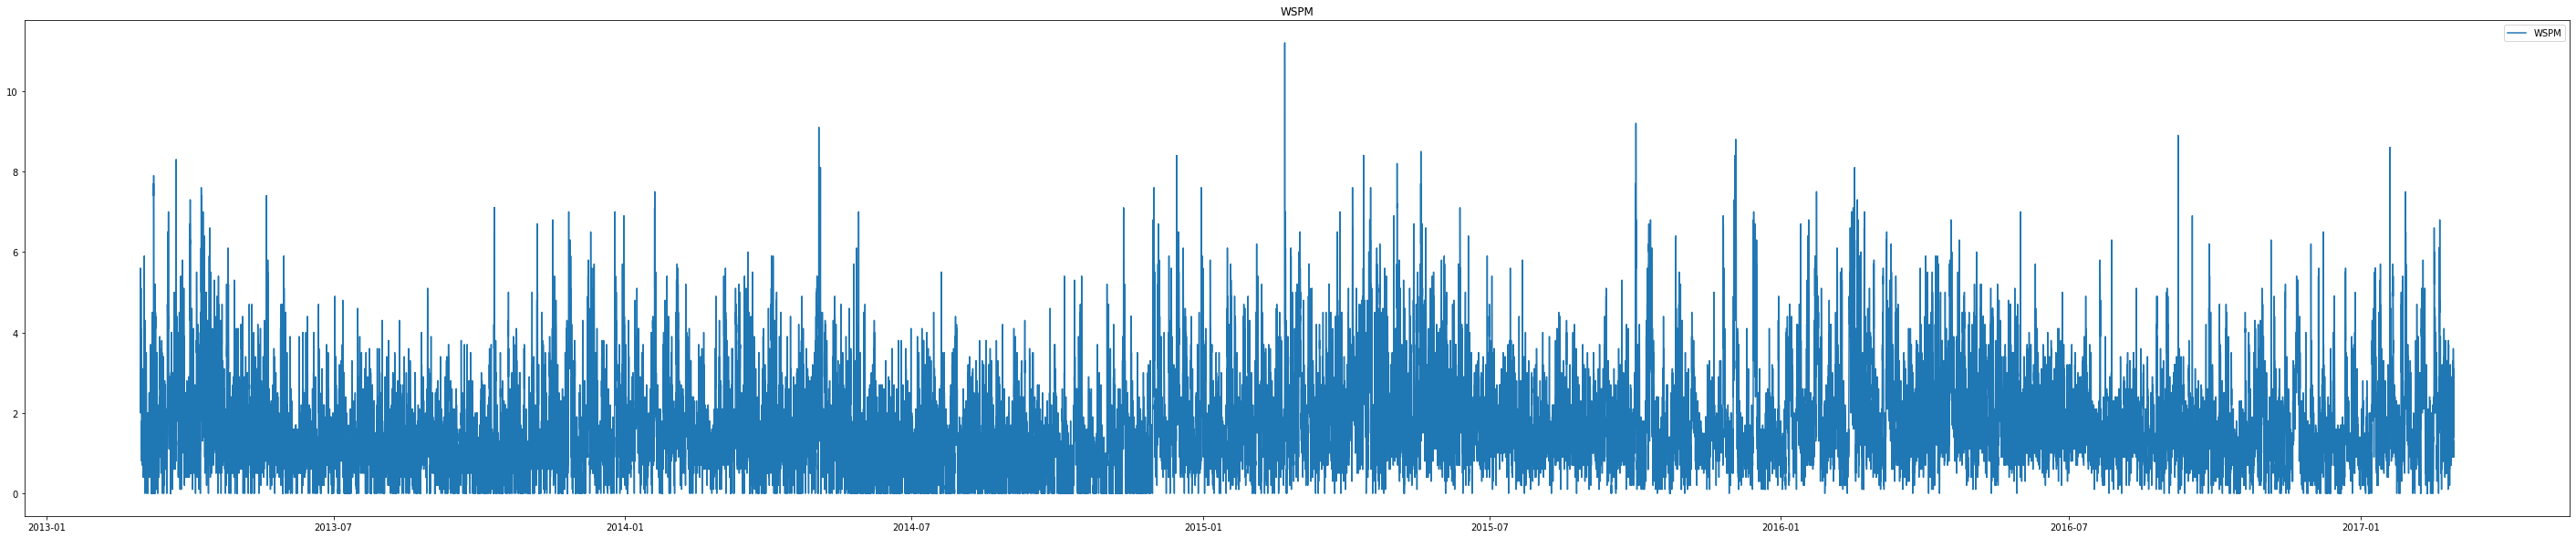

In [108]:
for x in ["PM2.5", *meteorological]:
    fig = plt.figure(figsize=(50, 10))
    plt.plot(dataset.index, dataset[x], label=x)
    plt.legend()
    plt.title(x)
    plt.show()
